 ______  ___     ______                        _________
___   |/  /________  /_______ _______ ______________  /
__  /|_/ /_  __ \_  __ \  __ `/_  __ `__ \  _ \  __  / 
_  /  / / / /_/ /  / / / /_/ /_  / / / / /  __/ /_/ /  
/_/  /_/  \____//_/ /_/\__,_/ /_/ /_/ /_/\___/\__,_/   
                                                       
_____________ _________      ___________        _________            
___    |__  /_______  /_____ ___  /__  /_______ ______  /____________
__  /| |_  __ \  __  /_  __ `/_  /__  //_/  __ `/  __  /_  _ \_  ___/
_  ___ |  /_/ / /_/ / / /_/ /_  / _  ,<  / /_/ // /_/ / /  __/  /    
/_/  |_/_.___/\__,_/  \__,_/ /_/  /_/|_| \__,_/ \__,_/  \___//_/     
                                                                     
 


___

# Logistic Regression Project 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [2]:
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from beautifultable import BeautifulTable

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, ParameterGrid, StratifiedKFold

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report

warnings.filterwarnings('ignore')

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [3]:
ad_data = pd.read_csv(r"advertising.csv")

**Check the head of ad_data**

In [4]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Use info and describe() on ad_data**

In [5]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [6]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

<AxesSubplot:xlabel='Age', ylabel='Count'>

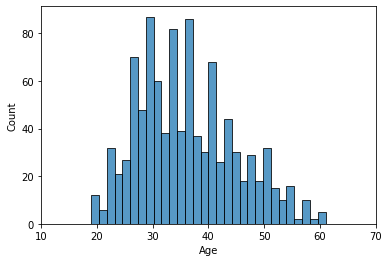

In [7]:
plt.xlim(10, 70)
sns.histplot(ad_data["Age"], bins=30)

**Create a jointplot showing Area Income versus Age.**

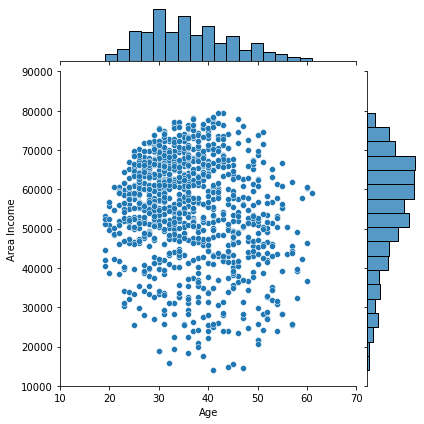

In [8]:
sns.jointplot(data=ad_data, x="Age", y="Area Income", xlim=(10, 70), ylim=(10000, 90000))

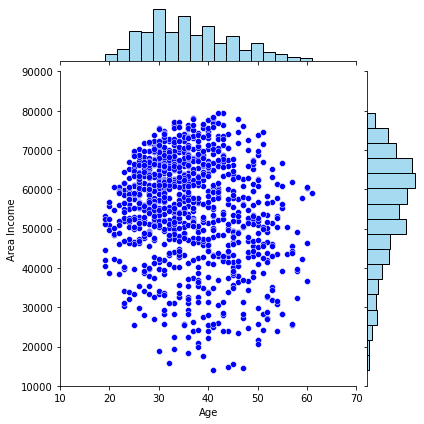

In [9]:
# Create the joint plot
sns.jointplot(data=ad_data, x="Age", y="Area Income", xlim=(10, 70), ylim=(10000, 90000), color="blue",
    marginal_kws=dict(bins=17, fill=True, color="skyblue")
)

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

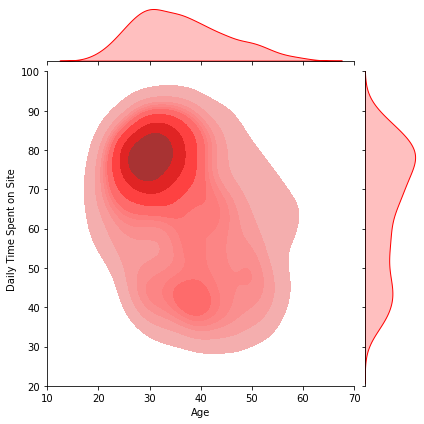

In [10]:
sns.jointplot(
    data=ad_data,
    x="Age",
    y="Daily Time Spent on Site",
    kind="kde",
    fill=True,
    color="red",
    xlim=(10, 70),
    ylim=(20, 100),
    marginal_kws=dict(color="red", fill=True)
)

** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

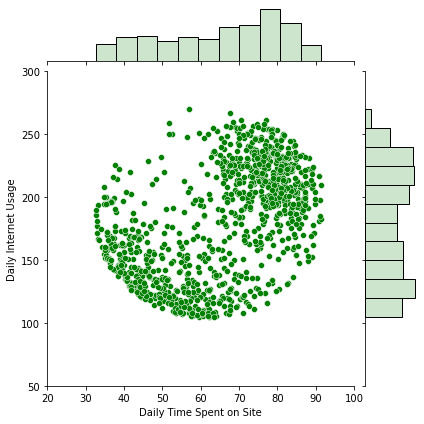

In [11]:
sns.jointplot(
    data=ad_data,
    x="Daily Time Spent on Site",
    y="Daily Internet Usage",
    color="green",
    xlim= (20, 100),
    ylim= (50, 300),
    marginal_kws=dict(bins=11, color="green", fill=True, alpha=0.2)
)

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

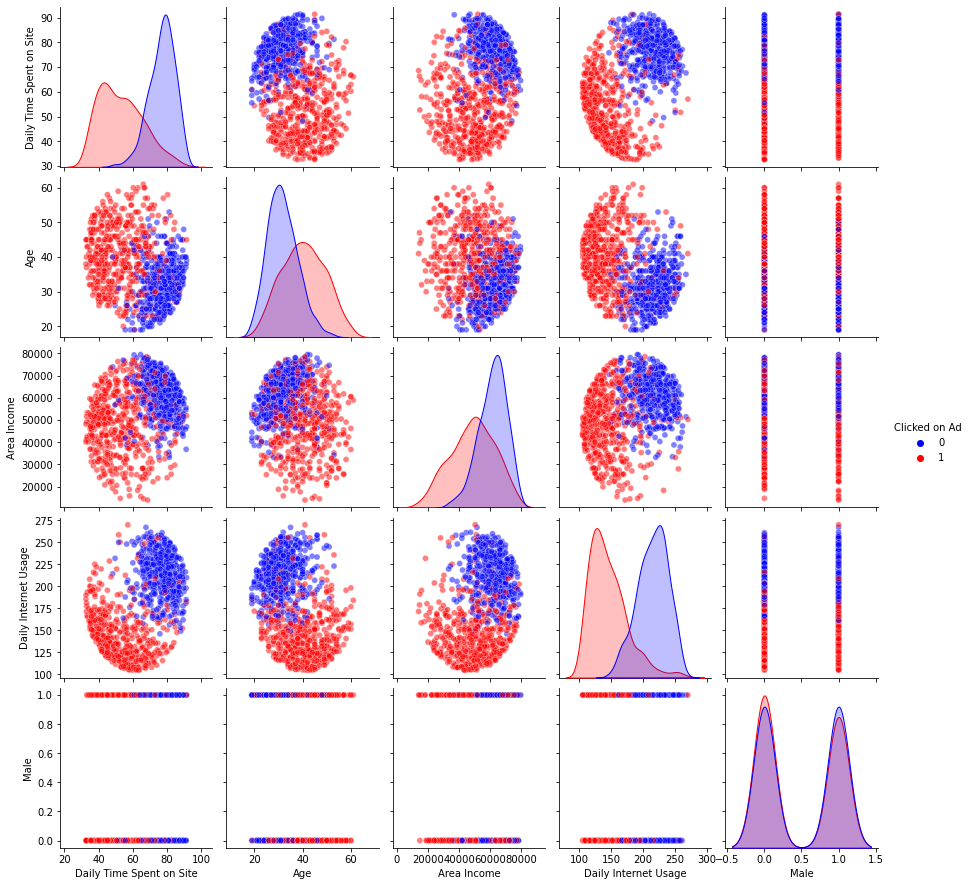

In [12]:
sns.pairplot(ad_data, hue='Clicked on Ad', palette=["blue", "red"], plot_kws={'alpha': 0.5})

## Data Preprocessing

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

In [13]:
ad_data.sample()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
776,56.46,26,66187.58,151.63,Ameliorated leadingedge help-desk,South Lisa,0,Albania,2016-04-07 18:52:57,1


In [14]:
columns_to_dropped = ["Ad Topic Line", "City", "Country", "Timestamp"]

for col in columns_to_dropped:
    print(f"{str(col).ljust(15)} : {len(ad_data[col].unique())}")

Ad Topic Line   : 1000
City            : 969
Country         : 237
Timestamp       : 1000


In [15]:
# All the previous column has a lot of categories to learn from so they will be deleted 
ad_data.drop(columns_to_dropped, axis=1, inplace=True)
ad_data.sample()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
45,37.68,52,53575.48,172.83,1,1


** Split the data into training set and testing set using train_test_split**

In [16]:
y = ad_data["Clicked on Ad"]
X = ad_data.drop(["Clicked on Ad"], axis=1)

Feature scaling

In [17]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, random_state=42, test_size = 0.2)

## Modeling

### 1- Logistic Regression

** Train and fit a logistic regression model on the training set.**

In [19]:
logReg_model = LogisticRegression()
logReg_model.fit(X_train, y_train)

LogisticRegression()

logistic regression hyperparameters tuning

https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/

In [20]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

y_pred_best = best_model.predict(X_test)
accuracy_score(y_pred_best, y_test)

Best Hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}


0.935

### Predictions and Evaluations
** Now predict values for the testing data.**

In [21]:
logReg_predictions = logReg_model.predict(X_test)

** Create a Confusion Matrix for the model.**

In [22]:
logReg_confMat = confusion_matrix(logReg_predictions, y_test)
logReg_confMat

array([[ 86,   5],
       [  3, 106]], dtype=int64)

In [23]:
logReg_acc = accuracy_score(logReg_predictions, y_test)
logReg_acc

0.96

### 2- k-Nearest Neighbors

In [24]:
kNN_model = KNeighborsClassifier(n_neighbors=1)
kNN_model.fit(X_train, y_train)

kNN_predictions = kNN_model.predict(X_test)

In [25]:
kNN_confMat = confusion_matrix(kNN_predictions, y_test)
kNN_confMat

array([[ 80,   9],
       [  9, 102]], dtype=int64)

In [26]:
accuracy_score(kNN_predictions, y_test)

0.91

### 3- Random forest classifier

In [27]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train,y_train)

random_forest_predictions = random_forest.predict(X_test)

In [28]:
random_forest_confMat = confusion_matrix(random_forest_predictions, y_test)
random_forest_confMat

array([[ 82,   7],
       [  7, 104]], dtype=int64)

In [29]:
accuracy_score(random_forest_predictions, y_test)

0.93

## Results Comparison

In [30]:
def evaluate_model_performance(y_pred, y_true):
    return accuracy_score(y_pred, y_true), precision_score(y_pred, y_true), recall_score(y_pred, y_true)

In [31]:
logReg_performance = evaluate_model_performance(logReg_predictions, y_test)
kNN_performance = evaluate_model_performance(kNN_predictions, y_test)
random_forest_performance = evaluate_model_performance(random_forest_predictions, y_test)

models = ['Logistic Regression', 'k-Nearest Neighbors', 'Random Forest']
performances = [logReg_performance, kNN_performance, random_forest_performance]

table = BeautifulTable()
table.columns.header = ["Model", "Accuracy", "Precision", "Recall"]

for model, performance in zip(models, performances):
    accuracy, precision, recall = performance
    table.rows.append([model, f"{accuracy:.2f}", f"{precision:.2f}", f"{recall:.2f}"])

print(table)

+---------------------+----------+-----------+--------+
|        Model        | Accuracy | Precision | Recall |
+---------------------+----------+-----------+--------+
| Logistic Regression |   0.96   |   0.95    |  0.97  |
+---------------------+----------+-----------+--------+
| k-Nearest Neighbors |   0.91   |   0.92    |  0.92  |
+---------------------+----------+-----------+--------+
|    Random Forest    |   0.93   |   0.94    |  0.94  |
+---------------------+----------+-----------+--------+


## Confusion Matrices Comparison

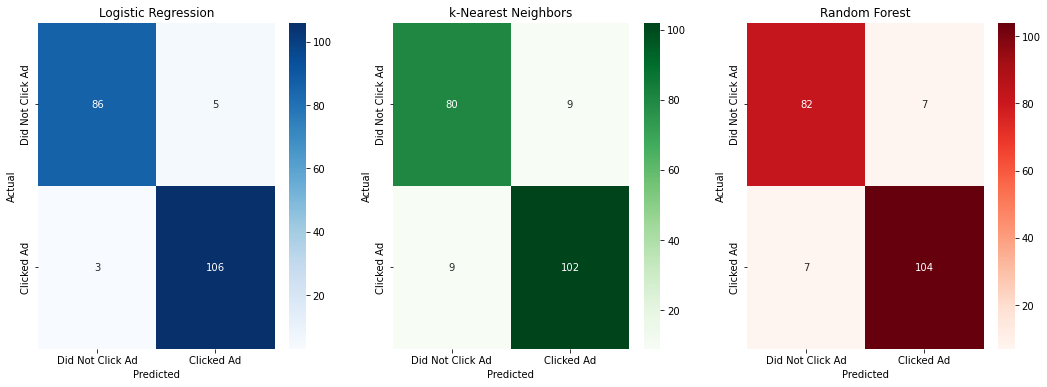

In [32]:
labels = ['Did Not Click Ad', 'Clicked Ad']
titles = ['Logistic Regression', 'k-Nearest Neighbors', 'Random Forest']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(logReg_confMat, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=axes[0])
axes[0].set_title(titles[0])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(kNN_confMat, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels, ax=axes[1])
axes[1].set_title(titles[1])
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

sns.heatmap(random_forest_confMat, annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels, ax=axes[2])
axes[2].set_title(titles[2])
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.show()

## Great Job!